# More on models

In [1]:
from __future__ import print_function

import numpy as np
import sncosmo

%matplotlib inline

In [2]:
# Other models (this one is a IIP)
model = sncosmo.Model(source='snana-2004hx')

(see http://sncosmo.readthedocs.org/en/latest/source-list.html for more)

In [3]:
print(model)

source:
  class      : TimeSeriesSource
  name       : 'snana-2004hx'
  version    : 1.0
  phases     : [-29.86, .., 79.95] days
  wavelengths: [300, .., 19990] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.0


In [4]:
# all the same methods work
model.set(amplitude=1.e-10)

In [5]:
model.bandmag('sdssg', 'ab', 10.)

6.1084230595606446

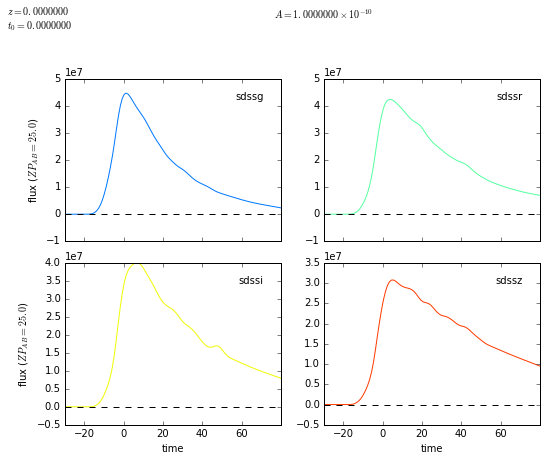

In [6]:
sncosmo.plot_lc(model=model, bands=['sdssg', 'sdssr', 'sdssi', 'sdssz']);

## Adding host galaxy dust

In [7]:
dust = sncosmo.CCM89Dust()

In [8]:
print(dust)

class           : CCM89Dust
wavelength range: [1000, 33333.3] Angstroms
parameters:
  ebv = 0.0
  r_v = 3.1000000000000001


In [9]:
model = sncosmo.Model(source='snana-2004hx', effects=[dust],
                      effect_names=['host'], effect_frames=['rest'])

In [10]:
print(model)

source:
  class      : TimeSeriesSource
  name       : 'snana-2004hx'
  version    : 1.0
  phases     : [-29.86, .., 79.95] days
  wavelengths: [300, .., 19990] Angstroms
effect (name='host' frame='rest'):
  class           : CCM89Dust
  wavelength range: [1000, 33333.3] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.0
  hostebv   = 0.0
  hostr_v   = 3.1000000000000001


In [11]:
model.set(hostebv=0.3, hostr_v=2.1)

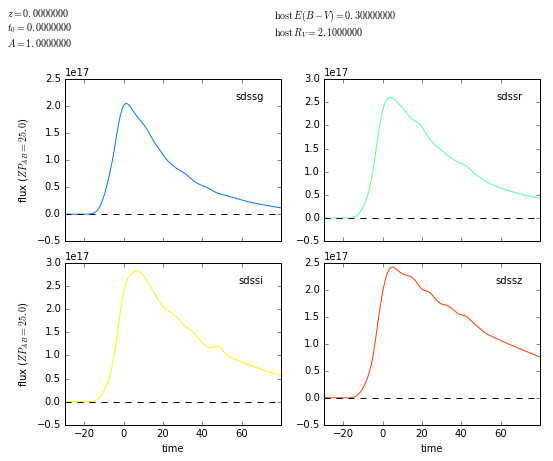

In [12]:
sncosmo.plot_lc(model=model, bands=['sdssg', 'sdssr', 'sdssi', 'sdssz']);